In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

import model_functions

Need emcee version 3
Current version: 3.1.2


# Follow T. Siegert's [Spectral_Fits_With_Background_Estimates.ipynb](https://github.com/tsiegert/for-students/blob/master/Spectral_Fits_With_Background_Estimates.ipynb) to find the "best" model for COSI's energy calibration via MCMC and AIC.

I'm using least squares likelihood ("When it comes to fitting linear regression coefficients, least squares and maximum likelihood agree…if you start from the assumption that the errors are normally distributed.") [reference here](https://bookdown.org/ltupper/340f21_notes/maximum-likelihood-and-least-squares.html)

In [2]:
def linear_fit(theta, ADC, energy):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant, slope
    a = theta[0]
    b = theta[1]
    
    # model
    model = a + ADC*b
    
    # cstat as above just with an exception that things must be positive
    #stat = -np.sum(model - data*np.log(model))
    
    # Not Cash statistic as in Thomas's notebook. That's specific to Poisson likelihood.
    # Use least squares as our likelihood to maximize here.
    data = energy
    stat = -np.sum((data - model)**2)
    
    # allow parameters to vary as needed by the data without any restrictions
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [3]:
def quadratic_fit(theta, ADC, energy):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant, slope, parabola
    a = theta[0]
    b = theta[1]
    c = theta[2]
    
    # model
    model = a + ADC * b + ADC**2 * c
    
    # cstat as above just with an exception that things must be positive
    #stat = -np.sum(model - data*np.log(model))
    
    # Not Cash statistic as in Thomas's notebook. That's specific to Poisson likelihood.
    # Use least squares as our likelihood to maximize here.
    data = energy
    stat = -np.sum((data - model)**2)
    
    # allow parameters to vary as needed by the data without any restrictions
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [4]:
def cubic_fit(theta, ADC, energy):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant, slope, parabola, cubic
    a = theta[0]
    b = theta[1]
    c = theta[2]
    f = theta[3]
    
    # model
    model = a + ADC * b + ADC**2 * c + ADC**3 * f
    
    # cstat as above just with an exception that things must be positive
    #stat = -np.sum(model - data*np.log(model))
    
    # Not Cash statistic as in Thomas's notebook. That's specific to Poisson likelihood.
    # Use least squares as our likelihood to maximize here.
    data = energy
    stat = -np.sum((data - model)**2)
    
    # allow parameters to vary as needed by the data without any restrictions
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [5]:
def quartic_fit(theta, ADC, energy):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant, slope, parabola, cubic, quartic
    a = theta[0]
    b = theta[1]
    c = theta[2]
    f = theta[3]
    g = theta[4]
    
    # model
    model = a + ADC * b + ADC**2 * c + ADC**3 * f  + ADC**4 * g
    
    # cstat as above just with an exception that things must be positive
    #stat = -np.sum(model - data*np.log(model))
    
    # Not Cash statistic as in Thomas's notebook. That's specific to Poisson likelihood.
    # Use least squares as our likelihood to maximize here.
    data = energy
    stat = -np.sum((data - model)**2)
    
    # allow parameters to vary as needed by the data without any restrictions
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

# Get the energy calibration data
## eventually import lines from ecal, here copy one manually


In [6]:
# Copied strip 0 n 1 (detector 0, side n, strip 1) from a Wanaka 2020 ecal file:
# ROU: dss 0 1 n
# Method:FittedPeak BM:Linear ELM:GaussianConvolvedDeltaFunction PSM:Gaussian
# CP dss 0 1 n pakw 14 266.449 59.541 2.06085 361.241 80.997 2.20873 543.972 122.061 2.02312 608.012 136.474 2.04384 1229.43 276.398 2.29643 1346.46 302.853 2.21268 1581.44 356.017 2.2921 1704.36 383.851 2.29859 2262.55 510.99 3.39112 2925.07 661.657 2.5688 3967.89 898.042 2.62267 5175.62 1173.24 2.86404 5622.14 1274.58 2.79547 5877.9 1332.5 2.60194 
# CM dss 0 1 n poly3 -0.111293 0.223942 9.77452e-07 -8.60173e-11 
# CR dss 0 1 n poly1 2.05891 0.000570339 

# the identified ADC values
ADC = np.array([266.449 , 361.241, 543.972, 608.012, 1229.43, 1346.46, 
        1581.44, 1704.36, 2262.55, 2925.07, 3967.89, 5175.62, 5622.14, 5877.9])

# the true photopeak energies [keV]
energy = np.array([59.541, 80.997, 122.061, 136.474, 276.398, 302.853, 
            356.017, 383.851, 510.99, 661.657, 898.042, 1173.24, 1274.58, 1332.5])


## Do the MCMC fit for each model

In [7]:
iters = 2000
nwalkers = 10

# for processing later
n_samples = iters
n_walkers = nwalkers

# which things to throw away
burnin = int(0.5*n_samples)

In [8]:
# linear mcmc fit
sampler_linear, samples_linear, samplesf_linear = model_functions.mcmc(
                                       init = np.array([-0.1, 0.2]), 
                                       ndim = 2,
                                       fit_func = linear_fit,
                                       ADC = ADC,
                                       energy = energy,
                                       nwalkers = nwalkers,
                                       iters = iters)


100%|██████████| 2000/2000 [00:01<00:00, 1468.01it/s]

Processing took 1.4 seconds


In [9]:
# quadratic mcmc fit
sampler_quadratic, samples_quadratic, samplesf_quadratic = model_functions.mcmc(
                                       init = np.array([-0.1, 0.2, 1E-7]), 
                                       ndim = 3,
                                       fit_func = quadratic_fit,
                                       ADC = ADC,
                                       energy = energy,
                                       nwalkers = nwalkers,
                                       iters = iters)


100%|██████████| 2000/2000 [00:01<00:00, 1431.13it/s]

Processing took 1.4 seconds


In [10]:
# cubic mcmc fit
sampler_cubic, samples_cubic, samplesf_cubic = model_functions.mcmc(
                                       init = np.array([-0.1, 0.2, 1E-7, 1E-11]), 
                                       ndim = 4,
                                       fit_func = cubic_fit,
                                       ADC = ADC,
                                       energy = energy,
                                       nwalkers = nwalkers,
                                       iters = iters)


100%|██████████| 2000/2000 [00:01<00:00, 1315.71it/s]

Processing took 1.5 seconds


In [11]:
# quartic mcmc fit
sampler_quartic, samples_quartic, samplesf_quartic = model_functions.mcmc(
                                       init = np.array([-0.1, 0.2, 1E-7, 1E-11, 1E-13]), 
                                       ndim = 5,
                                       fit_func = quartic_fit,
                                       ADC = ADC,
                                       energy = energy,
                                       nwalkers = nwalkers,
                                       iters = iters)


100%|██████████| 2000/2000 [00:01<00:00, 1164.04it/s]

Processing took 1.7 seconds


## View the fitted parameters

In [12]:
print('Linear:')
model_functions.parameter_table(samples_linear, ndim=2, burnin=burnin)

print('\nQuadratic:')
model_functions.parameter_table(samples_quadratic, ndim=3, burnin=burnin)

print('\nCubic:')
model_functions.parameter_table(samples_cubic, ndim=4, burnin=burnin)

print('\nQuartic:')
model_functions.parameter_table(samples_quartic, ndim=5, burnin=burnin)


Linear:
Results:
 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0: -2.02e+00  2.95e-01 -2.90e+00 -2.32e+00 -2.02e+00 -1.73e+00 -1.13e+00
        1:  2.27e-01  9.70e-05  2.27e-01  2.27e-01  2.27e-01  2.27e-01  2.27e-01

Quadratic:
Results:
 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0: -8.89e-01  4.90e-01 -2.39e+00 -1.39e+00 -8.74e-01 -3.96e-01  5.66e-01
        1:  2.26e-01  4.50e-04  2.24e-01  2.25e-01  2.26e-01  2.26e-01  2.27e-01
        2:  2.15e-07  7.12e-08  3.21e-09  1.44e-07  2.16e-07  2.87e-07  4.31e-07

Cubic:
Results:
 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0: -2.08e-01  6.65e-01 -2.25e+00 -8.66e-01 -2.01e-01  4.64e-01  1.69e+00
        1:  2.24e-01  1.11e-03  2.21e-01  2.23e-01  2.24e-01  2.25e-01  2.27e-01
        2:  8.90e-07  4.59e-07 -4.26e-07  4.37e-07  8.83e-07  1.36e-06  2.19e-06
        3: -7.73e-11  5.15e-11 -2.23e-10 -1.29e-10 -7.

### This is nice...now we have uncertainties (!!) on our fit parameters.
Notice that the cubic results here are pretty close to melinator's poly3 fit in the ecal lines above.

## Plot the posterior distributions

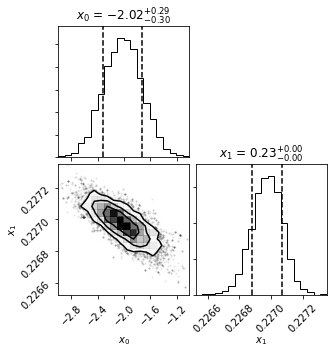

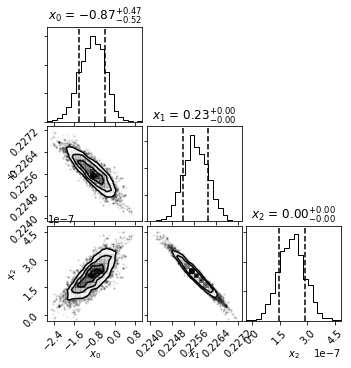

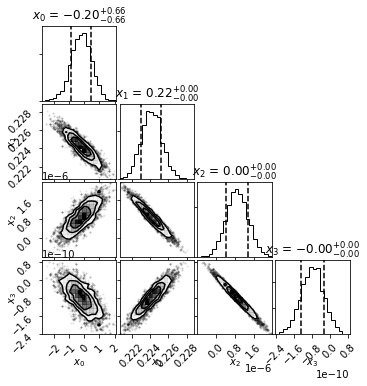

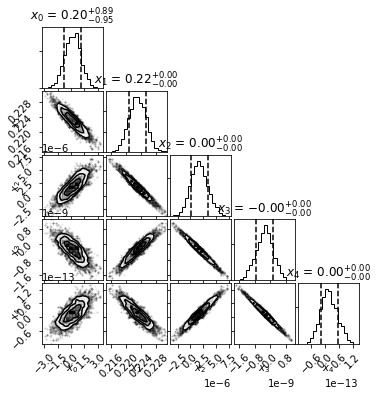

In [13]:
# linear
labels_linear = [r'$x_0$', r'$x_1$']

fig = corner.corner(samplesf_linear[burnin*nwalkers:,:],
                    labels=labels_linear,
                    quantiles=[0.1585, 0.8415],
                    show_titles=True)
fig.set_size_inches(5, 5)

# quadratic
labels_quadratic = [r'$x_0$', r'$x_1$', r'$x_2$']

fig = corner.corner(samplesf_quadratic[burnin*nwalkers:,:],
                    labels=labels_quadratic,
                    quantiles=[0.1585, 0.8415],
                    show_titles=True)
fig.set_size_inches(5, 5)


# cubic
labels_cubic = [r'$x_0$', r'$x_1$', r'$x_2$', r'$x_3$']

fig = corner.corner(samplesf_cubic[burnin*nwalkers:,:],
                    labels=labels_cubic,
                    quantiles=[0.1585, 0.8415],
                    show_titles=True)
fig.set_size_inches(5, 5)


# quartic
labels_quartic = [r'$x_0$', r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$']

fig = corner.corner(samplesf_quartic[burnin*nwalkers:,:],
                    labels=labels_quartic,
                    quantiles=[0.1585, 0.8415],
                    show_titles=True)
fig.set_size_inches(5, 5)


## Evaluate the models

In [14]:
# linear
y_models_linear = model_functions.evaluate_model(ADC, nwalkers, iters, samplesf_linear, ndim=2)

# quadratic
y_models_quadratic = model_functions.evaluate_model(ADC, nwalkers, iters, samplesf_quadratic, ndim=3)

# cubic
y_models_cubic = model_functions.evaluate_model(ADC, nwalkers, iters, samplesf_cubic, ndim=4)

# quartic
y_models_quartic = model_functions.evaluate_model(ADC, nwalkers, iters, samplesf_quartic, ndim=5)


## Plot the models
Line is the median. Contours show $1\sigma$ and $2\sigma$ intervals.

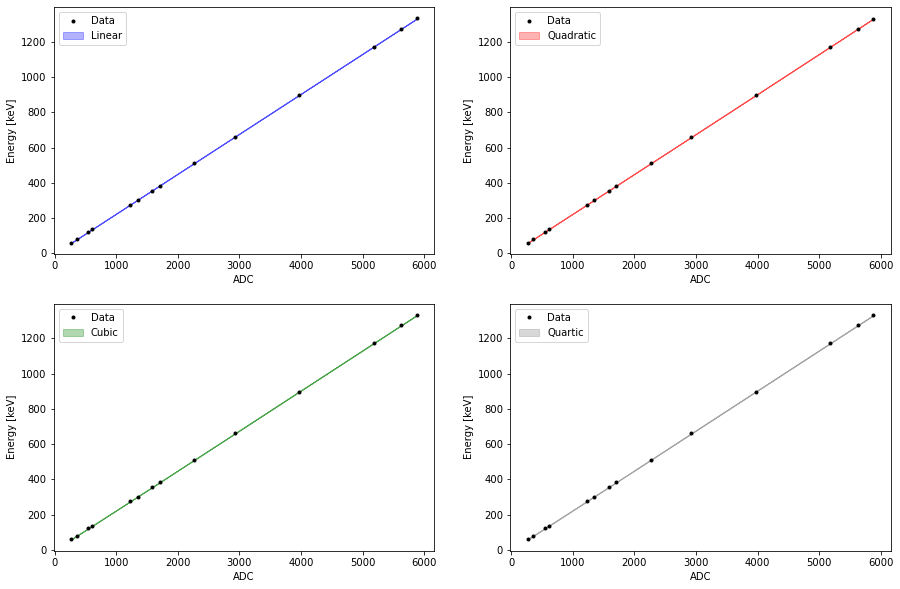

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
model_functions.plot_model(y_models_linear, ADC, energy, 
                            model_label='Linear', 
                            color='blue')

plt.subplot(222)
model_functions.plot_model(y_models_quadratic, ADC, energy, 
                            model_label='Quadratic', 
                            color='red')

plt.subplot(223)
model_functions.plot_model(y_models_cubic, ADC, energy, 
                            model_label='Cubic', 
                            color='green')

plt.subplot(224)
model_functions.plot_model(y_models_quartic, ADC, energy, 
                            model_label='Quartic', 
                            color='gray')


## Plot the residuals
Contours show $1\sigma$ and $2\sigma$ intervals.

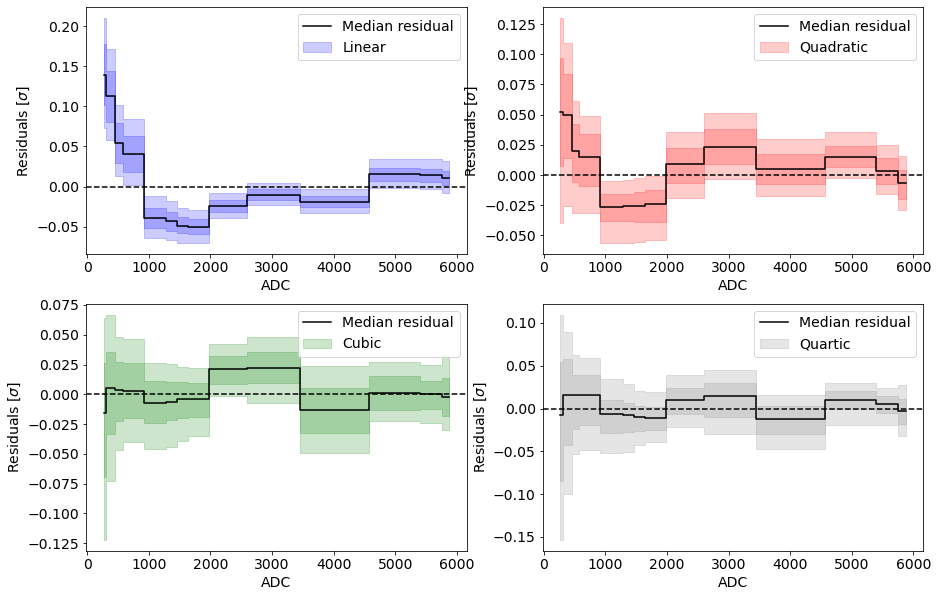

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
model_functions.plot_residual_per_deviation(y_models_linear, ADC, energy, 
                            model_label='Linear', 
                            color='blue')

plt.subplot(222)
model_functions.plot_residual_per_deviation(y_models_quadratic, ADC, energy, 
                            model_label='Quadratic', 
                            color='red')

plt.subplot(223)
model_functions.plot_residual_per_deviation(y_models_cubic, ADC, energy, 
                            model_label='Cubic', 
                            color='green')

plt.subplot(224)
model_functions.plot_residual_per_deviation(y_models_quartic, ADC, energy, 
                            model_label='Quartic', 
                            color='gray')

#plt.savefig("deviation_from_linearity_residuals.pdf")

### Yep, there are our non-linearities at low energies.

## Look at the maximum likelihood of each model

In [17]:
lnliks = np.array([np.max(sampler_linear.lnprobability),
                   np.max(sampler_quadratic.lnprobability),
                   np.max(sampler_cubic.lnprobability),
                   np.max(sampler_quartic.lnprobability)])

n_par = np.arange(2, 6)


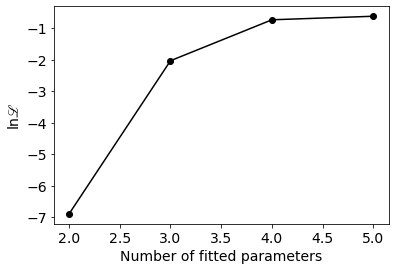

In [18]:
plt.plot(n_par, lnliks, 'ko-')
plt.xlabel('Number of fitted parameters', fontsize=14)
plt.ylabel(r'$\ln\mathscr{L}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#plt.savefig("deviation_from_linearity_likelihood.pdf")

As shown above, the higher the likelihood the better the fit. This statement is always true: the more parameters you use, the better the likelihood becomes. 

# AIC

However, at some point you start over-fitting, i.e. you add one degree of freedom (one parameter) but change the likelihood only by a small amount.

We can use the AIC (Akaika Information Criterion) to confidently pick the most adequate model.
The AIC is conveniently defined as $AIC = -2(ln\mathscr{L} - n_{par})$, and we plot $\Delta$AIC-values to actually see something hapenning.

In [19]:
AIC = -2*(lnliks-n_par)
AICmin = np.min(AIC)

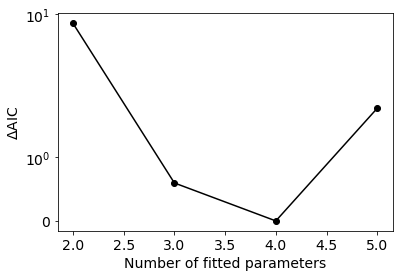

In [20]:
plt.plot(n_par, AIC - AICmin, 'ko-', 
         label='Change from model with minimum AIC')
plt.xlabel('Number of fitted parameters', fontsize=14)
plt.ylabel(r'$\Delta\mathrm{AIC}$', fontsize=14)
plt.yscale('symlog')
#plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#plt.savefig("deviation_from_linearity_AIC.pdf")

### Cubic polynomial has the minimum AIC.

### Plot the "relative likelihood" of each model (taken from wikipedia)
https://en.wikipedia.org/wiki/Akaike_information_criterion

The quantity $e^{(AIC_{min} − AIC_i)/2}$ is proportional to the probability that the ith model minimizes the (estimated) information loss.

e.g. three candidate models, whose AIC values are 100, 102, and 110. 
The second model is $e^{(100 − 102)/2} = 0.368$ times as probable as the first model to minimize information loss.  The third model is $e^{(100 − 110)/2} = 0.007$ times as probable as the first model to minimize the information loss, i.e. not likely that the third model minimizes info loss compared to the first.

In [21]:
relative_likelihood = np.exp((AICmin - AIC)/2.)

Relative likelihoods: 
 [0.01561344 0.74156098 1.         0.41156935]


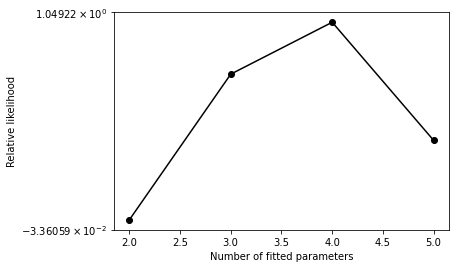

In [22]:
# relative likelihood
print(f'Relative likelihoods: \n {relative_likelihood}')

plt.plot(n_par, relative_likelihood, 'ko-')
plt.xlabel('Number of fitted parameters')
plt.ylabel('Relative likelihood')
plt.yscale('symlog');

### According to AIC, it looks like the cubic model is best for this strip. Second-best model is parabolic, followed by quartic and linear.